In [20]:
import pandas as pd
import numpy as np
import re
import string
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:

df = pd.read_csv("twitter_training.csv", nrows=10000)
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
#Renaming the columns
df.columns = ["ID", "Category", "Sentiment", "Tweet"]

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9888 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         9888 non-null   int64 
 1   Category   9888 non-null   object
 2   Sentiment  9888 non-null   object
 3   Tweet      9888 non-null   object
dtypes: int64(1), object(3)
memory usage: 386.2+ KB


In [7]:
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)


df['cleaned_tweet'] = df['Tweet'].apply(preprocess_text)

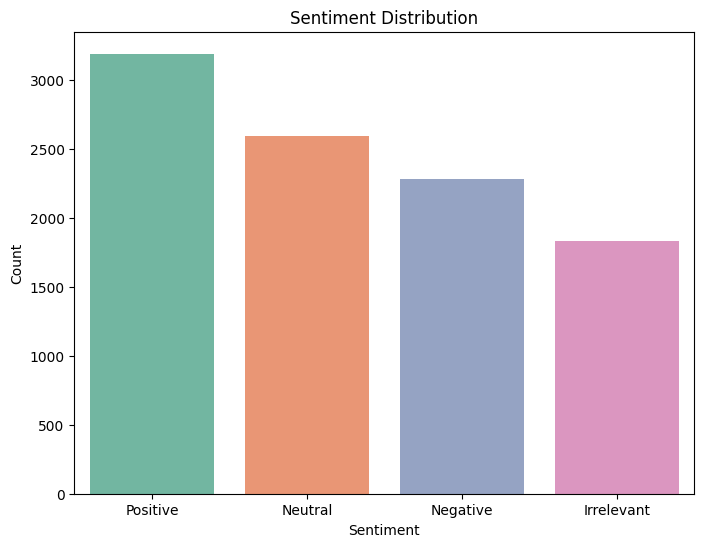

In [37]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', palette='Set2', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

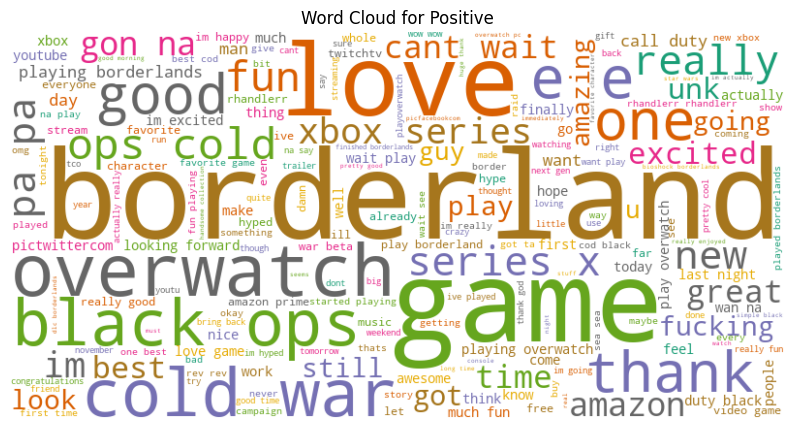

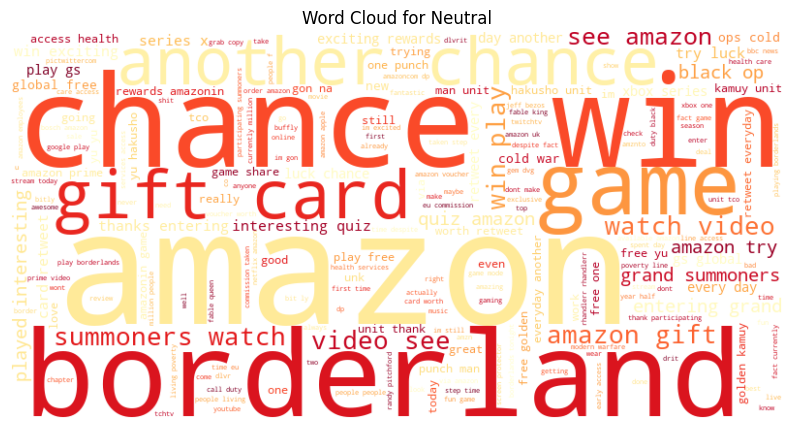

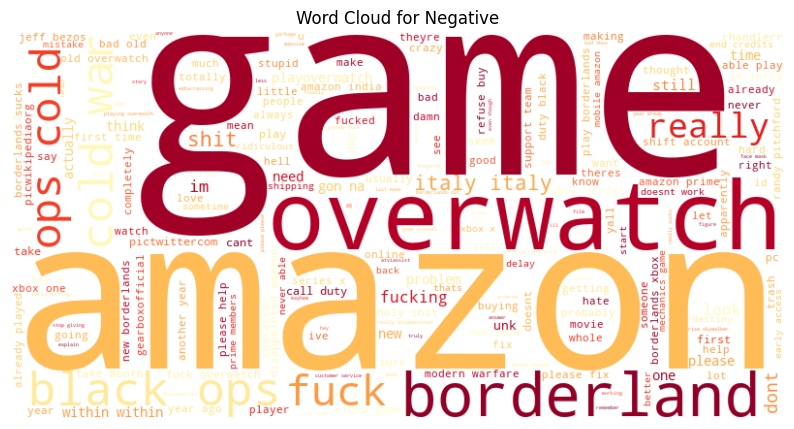

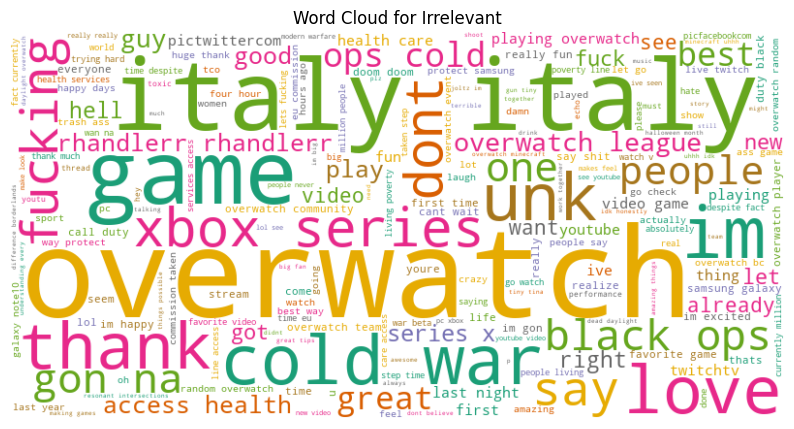

In [26]:
# Word Cloud for each sentiment
cmaps = ['Dark2', 'Oranges', 'YlOrRd']
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_tweet'])
    color = random.choice(cmaps)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment}')
    plt.axis('off')
    plt.show()
    plt.close()
 


## Feature Engineering

In [27]:
# Feature Engineering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['Sentiment']

Naïve Bayes Accuracy: 0.8150

              precision    recall  f1-score   support

  Irrelevant       0.97      0.57      0.72       364
    Negative       0.87      0.84      0.86       449
     Neutral       0.92      0.76      0.83       498
    Positive       0.70      0.97      0.82       667

    accuracy                           0.81      1978
   macro avg       0.87      0.79      0.81      1978
weighted avg       0.85      0.81      0.81      1978



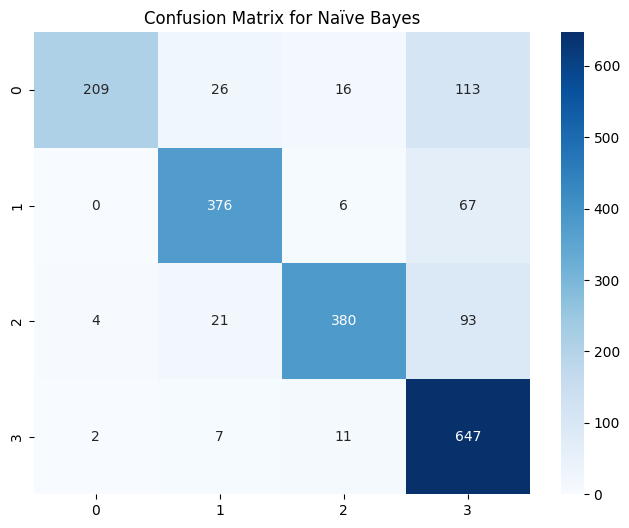

Logistic Regression Accuracy: 0.8675

              precision    recall  f1-score   support

  Irrelevant       0.91      0.81      0.86       364
    Negative       0.90      0.87      0.88       449
     Neutral       0.84      0.86      0.85       498
    Positive       0.84      0.90      0.87       667

    accuracy                           0.87      1978
   macro avg       0.88      0.86      0.87      1978
weighted avg       0.87      0.87      0.87      1978



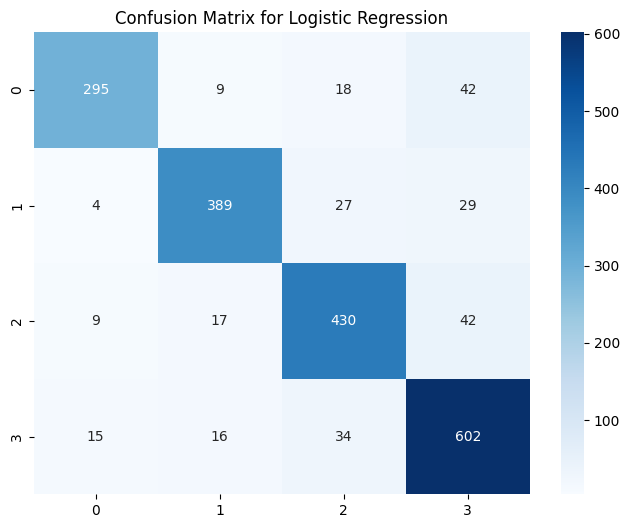

Random Forest Accuracy: 0.9277

              precision    recall  f1-score   support

  Irrelevant       0.95      0.91      0.93       364
    Negative       0.93      0.91      0.92       449
     Neutral       0.94      0.92      0.93       498
    Positive       0.90      0.96      0.93       667

    accuracy                           0.93      1978
   macro avg       0.93      0.92      0.93      1978
weighted avg       0.93      0.93      0.93      1978



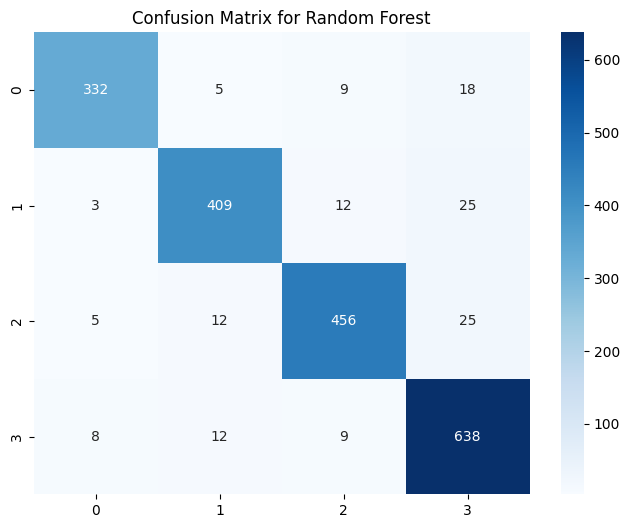

In [43]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the models
models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy})
    print(f"{name} Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred))


    # heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [49]:
# Model Accuracy Comparison
results_df = pd.DataFrame(results)
fig = px.bar(results_df, x='Model', y='Accuracy', color='Model', title='Model Accuracy Comparison')
fig.update_layout
fig.show()
